In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [3]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170498071/170498071 [==============================] - 87s 1us/step


In [5]:
print('train:',len(x_img_train))
print('test:',len(x_img_test))

train: 50000
test: 10000


(50000, 32, 32, 3)

In [6]:
print(x_img_train.shape)
print(y_label_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [7]:
label_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'dog',
             7:'horse',8:'ship',9:'truck'}

In [8]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx], cmap='binary')
        title=str(i)+',' + label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    #plt.imshow(image,cmap='binary')
    plt.show()

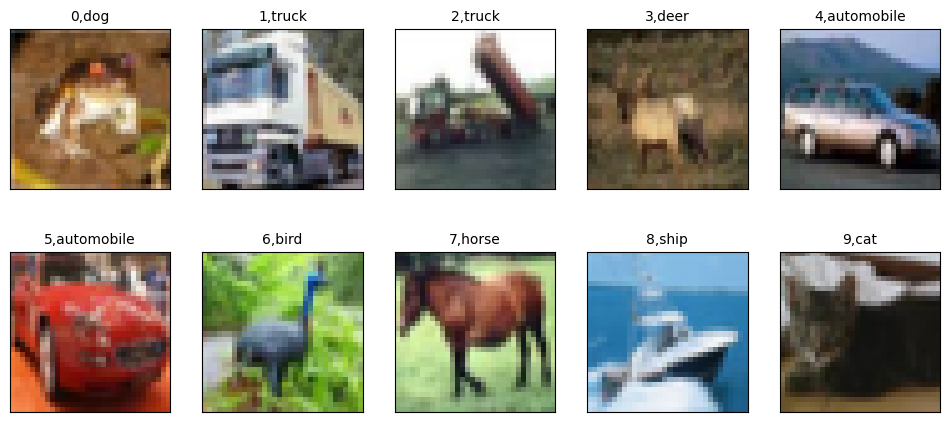

In [9]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [10]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [13]:
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0

In [14]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [15]:
print(y_label_train.shape)
y_label_train[:5]

(50000, 1)


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
from keras.src.utils.np_utils import to_categorical as tc
y_label_train_OneHot = tc(y_label_train)
y_label_test_OneHot = tc(y_label_test)

In [17]:
print(y_label_train_OneHot.shape)
y_label_train_OneHot[:5]

(50000, 10)


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [19]:
model = Sequential()

model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                padding='same',
                input_shape=(32,32,3),
                activation='relu'))

model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),
                activation='relu', padding='same'))

In [20]:
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [22]:
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10,activation='softmax'))

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [24]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [25]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                         validation_split=0.2,
                         epochs=10,batch_size=128,verbose=1)

Epoch 1/10
313/313 [==============================] - 14s 43ms/step - loss: 1.5384 - accuracy: 0.4493 - val_loss: 1.3567 - val_accuracy: 0.5584
Epoch 2/10
313/313 [==============================] - 13s 42ms/step - loss: 1.1933 - accuracy: 0.5781 - val_loss: 1.1795 - val_accuracy: 0.6158
Epoch 3/10
313/313 [==============================] - 14s 45ms/step - loss: 1.0423 - accuracy: 0.6339 - val_loss: 1.0949 - val_accuracy: 0.6360
Epoch 4/10
313/313 [==============================] - 16s 51ms/step - loss: 0.9495 - accuracy: 0.6659 - val_loss: 1.0035 - val_accuracy: 0.6742
Epoch 5/10
313/313 [==============================] - 17s 55ms/step - loss: 0.8552 - accuracy: 0.6984 - val_loss: 0.9496 - val_accuracy: 0.6875
Epoch 6/10
313/313 [==============================] - 18s 57ms/step - loss: 0.7697 - accuracy: 0.7308 - val_loss: 0.9097 - val_accuracy: 0.6894
Epoch 7/10
313/313 [==============================] - 18s 59ms/step - loss: 0.6954 - accuracy: 0.7563 - val_loss: 0.8643 - val_accuracy:

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

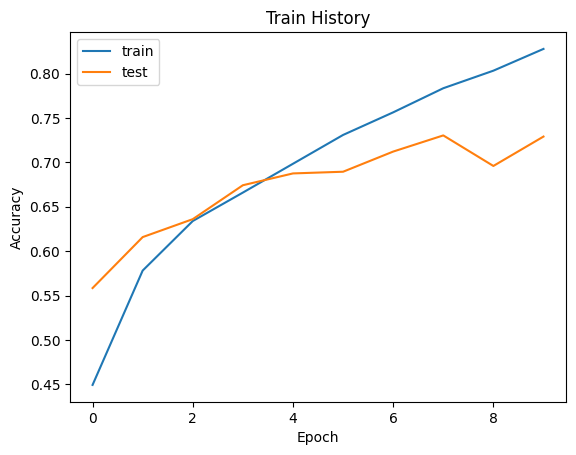

In [27]:
show_train_history('accuracy','val_accuracy')

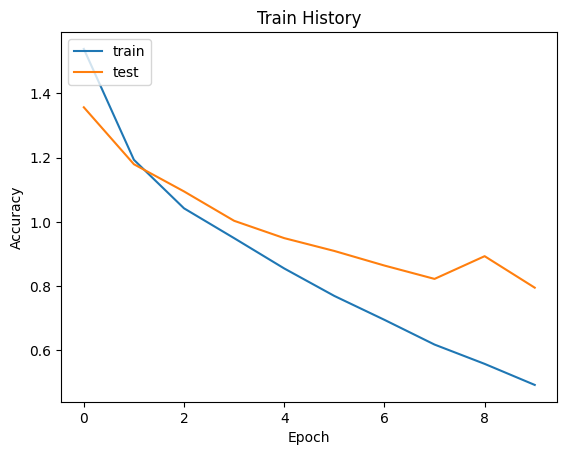

In [28]:
show_train_history('loss','val_loss')

In [29]:
scores = model.evaluate(x_img_test_normalize,
                       y_label_test_OneHot, verbose=0)
scores[1]

0.7279000282287598

In [31]:
prediction = np.argmax(model.predict(x_img_test_normalize),axis=1)

313/313 [==============================] - 1s 4ms/step


In [32]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [33]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx], cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    #plt.imshow(image,cmap='binary')
    plt.show()

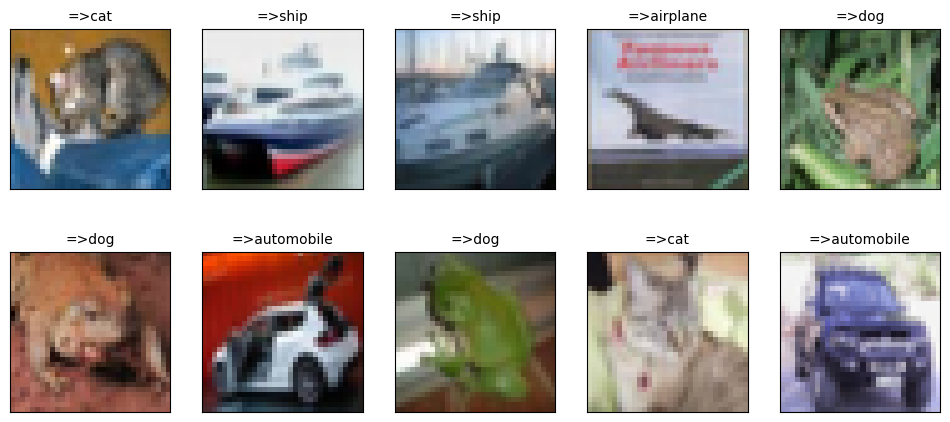

In [34]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

In [35]:
Predicted_Probability=model.predict(x_img_test_normalize)

313/313 [==============================] - 1s 4ms/step


In [36]:
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
         'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: airplane predict: airplane


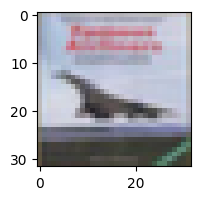

airplane Probability:0.446208537
automobile Probability:0.017698351
bird Probability:0.116234206
cat Probability:0.008108585
deer Probability:0.020433314
dog Probability:0.000336491
dog Probability:0.003962250
horse Probability:0.002132412
ship Probability:0.379814029
truck Probability:0.005071852


In [37]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,3)

In [38]:
prediction.shape

(10000,)

In [39]:
y_label_test.shape

(10000, 1)

In [40]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [41]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
           rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'dog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,728,12,67,29,19,5,16,10,74,40
1,11,823,17,15,3,3,12,3,33,80
2,44,1,637,62,99,56,66,21,10,4
3,11,5,72,607,55,122,86,25,10,7
4,12,1,71,73,711,28,58,37,9,0
5,12,1,49,226,53,573,47,32,4,3
6,3,1,35,49,48,21,837,0,4,2
7,15,2,47,58,62,52,16,743,2,3
8,38,31,23,25,11,3,13,2,836,18
